# Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/91976/DataScience Projects/Fraud.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


# Data Preprocessing

In [3]:
df.shape

(6362620, 11)

In [4]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
zero_count = (df['oldbalanceDest'] == 0).sum()
print(zero_count)

2704388


In [8]:
zero_count = (df['newbalanceDest'] == 0).sum()
print(zero_count)

2439433


In [9]:
# Check how many of these "zero-to-zero" transactions are frauds

zero_balance = df[(df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)]

fraud_in_zero_balance = zero_balance['isFraud'].sum()
total_zero_rows = len(zero_balance)

print(f"Frauds with zero balances: {fraud_in_zero_balance} out of {total_zero_rows}")

Frauds with zero balances: 4076 out of 2317282


In [10]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
8213/6354407

0.0012924888191769902

# Feature Engineering

In [12]:
df['errorBalanceOrig'] = df['oldbalanceOrg'] - df['amount'] - df['newbalanceOrig']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,11668.14


In [13]:
count = (df['errorBalanceOrig'] > 0).sum()
print(count)

206645


In [14]:
count = (df['errorBalanceDest'] > 0).sum()
print(count)

4080363


In [15]:
df['newaccountDest'] = ((df['oldbalanceDest'] == 0) & (df['newbalanceDest'] > 0)).astype(int)
df[df['newaccountDest'] == 1]['isFraud'].sum()

1275

In [16]:
df = df.drop(['nameOrig', 'nameDest'], axis = 'columns')
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,newaccountDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,9839.64,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,1864.28,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0.0,181.00,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,21363.00,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,11668.14,0


# EDA

In [17]:
import seaborn as sns

C:\Users\91976\AppData\Local\Temp\ipykernel_37840\2205336506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = type_counts.index, y = type_counts.values, palette = 'Set2')


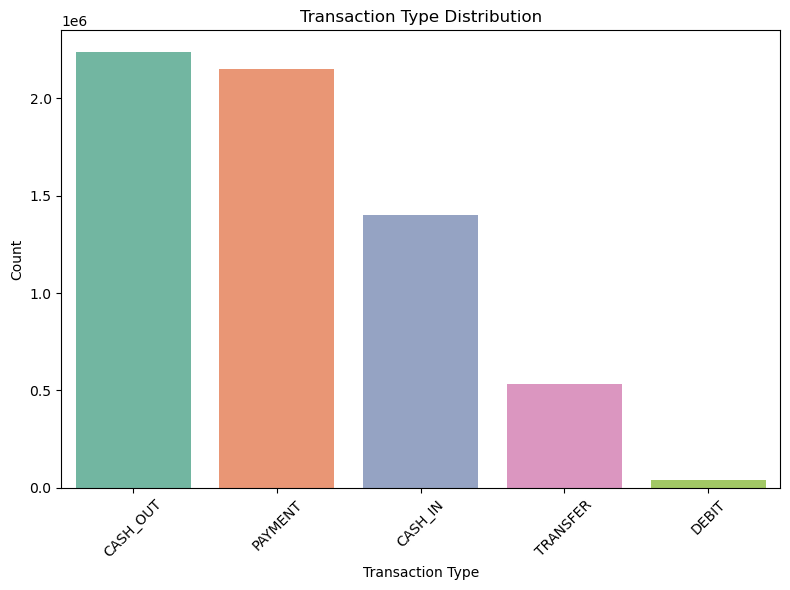

In [18]:
type_counts = df['type'].value_counts()

plt.figure(figsize = (8, 6))
sns.barplot(x = type_counts.index, y = type_counts.values, palette = 'Set2')
plt.title('Transaction Type Distribution')
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\91976\AppData\Local\Temp\ipykernel_37840\118683665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = fraud_rate.index, y = fraud_rate.values, palette = 'Set1')


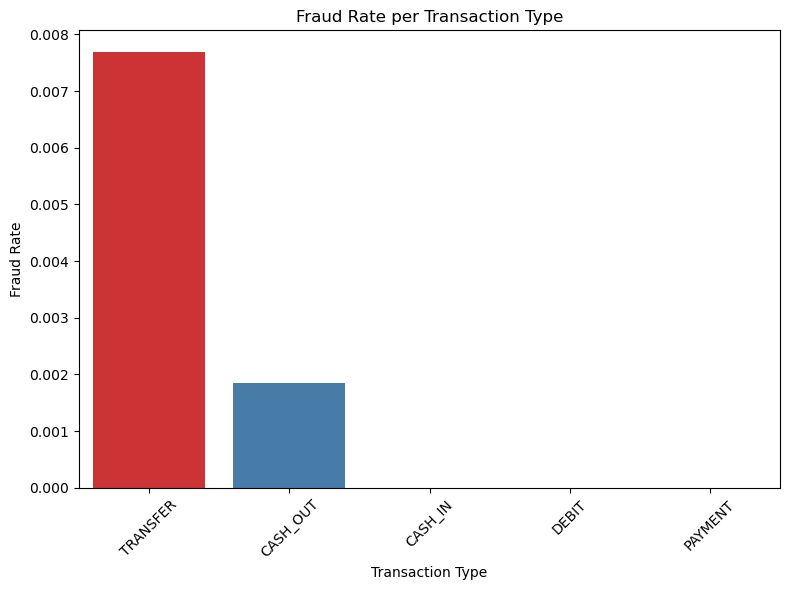

In [19]:
# Fraud rate per type = frauds / total per type
fraud_rate = df.groupby('type')['isFraud'].mean().sort_values(ascending = False)

plt.figure(figsize = (8, 6))
sns.barplot(x = fraud_rate.index, y = fraud_rate.values, palette = 'Set1')
plt.title('Fraud Rate per Transaction Type')
plt.ylabel('Fraud Rate')
plt.xlabel('Transaction Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\91976\AppData\Local\Temp\ipykernel_37840\542471583.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount_capped', data=df, palette='coolwarm')


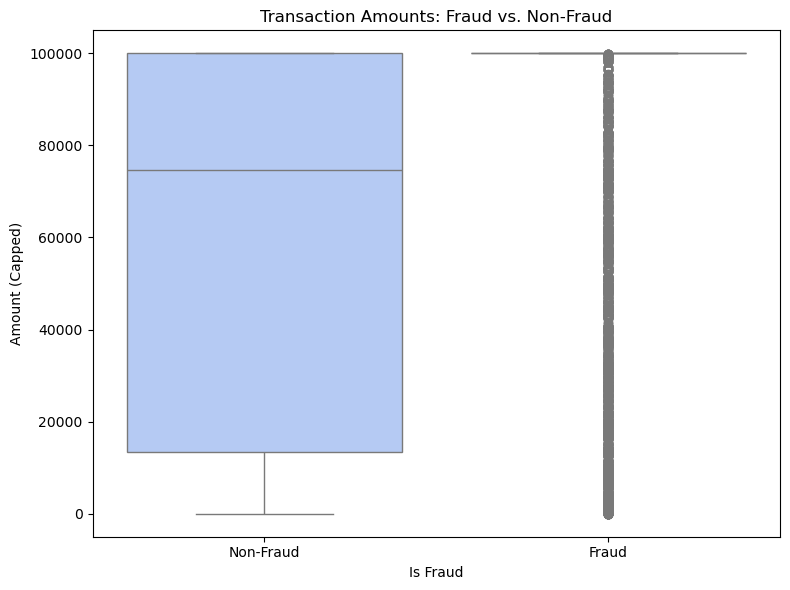

In [20]:
# cap max amount for better visualization
df['amount_capped'] = df['amount'].clip(upper=100000)  # adjust cap if needed

plt.figure(figsize=(8, 6))
sns.boxplot(x='isFraud', y='amount_capped', data=df, palette='coolwarm')
plt.title('Transaction Amounts: Fraud vs. Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Amount (Capped)')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

# Encoding

In [21]:
df = df.drop(['isFlaggedFraud'], axis = 'columns')

In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first', sparse_output = False)

ohe_array = ohe.fit_transform(df[['type']])
ohe_feature_names = ohe.get_feature_names_out(['type'])
ohe_df = pd.DataFrame(ohe_array, columns = ohe_feature_names, index = df.index)

df = df.drop(['type'], axis = 'columns')
df = pd.concat([df, ohe_df], axis = 'columns')

df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,newaccountDest,amount_capped,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0.0,9839.64,0,9839.64,0.0,0.0,1.0,0.0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0.0,1864.28,0,1864.28,0.0,0.0,1.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1,0.0,181.00,0,181.00,0.0,0.0,0.0,1.0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0.0,21363.00,0,181.00,1.0,0.0,0.0,0.0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0.0,11668.14,0,11668.14,0.0,0.0,1.0,0.0


# Model Selection

In [23]:
X = df.drop(['isFraud'], axis = 'columns')
y = df.isFraud

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', random_state = 42)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\91976\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9412765495974929

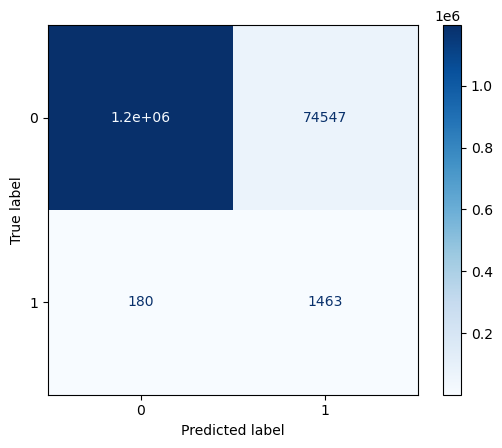

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = lr.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [27]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9413    0.9697   1270881
           1     0.0192    0.8904    0.0377      1643

    accuracy                         0.9413   1272524
   macro avg     0.5095    0.9159    0.5037   1272524
weighted avg     0.9986    0.9413    0.9685   1272524



In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [29]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(class_weight='balanced', random_state=42), 
        'params': {
            'n_estimators': [1],
            'max_depth': [20]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'params': {
            'max_depth': [5],
            'criterion': ['gini']
        }
    }
}    

In [30]:
scores = []

from sklearn.model_selection import GridSearchCV

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False, scoring='f1', n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
    'model': model_name,
    'best_score': clf.best_score_,
    'best_params': clf.best_params_
    })

In [31]:
scores_df = pd.DataFrame(scores)
scores_df

,model,best_score,best_params
0,random_forest,0.921242,"{'max_depth': 20, 'n_estimators': 1}"
1,decision_tree,0.997330,"{'criterion': 'gini', 'max_depth': 5}"


In [33]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42, max_depth = 5, criterion = 'gini')
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9999968566408177

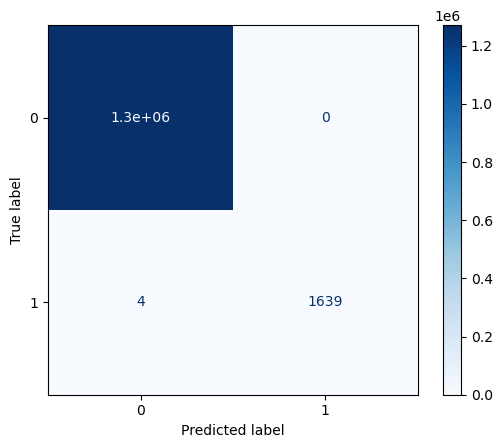

In [34]:
# Predict on test set
y_pred = dt.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='Blues')

In [35]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000   1270881
           1     1.0000    0.9976    0.9988      1643

    accuracy                         1.0000   1272524
   macro avg     1.0000    0.9988    0.9994   1272524
weighted avg     1.0000    1.0000    1.0000   1272524



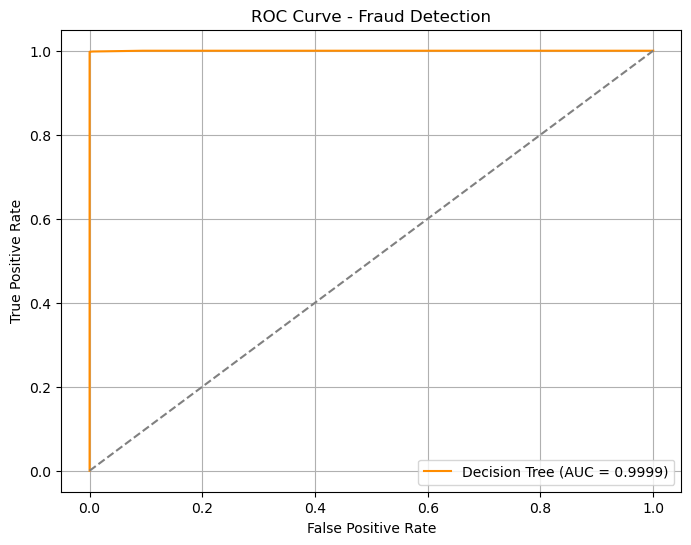

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_probs = dt.predict_proba(X_test)[:, 1]  # Probability of class 1 (fraud)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.4f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Fraud Detection")
plt.legend()
plt.grid()
plt.show()